# **Hanoi Weather Pattern Prediction using AI**
**GROUP MEMBERS**
1. Nguyễn Huy Diễn 20235910
2. Phạm Song Hào 20235930
3. Nguyễn Nhật Anh 20235892
4. Trần Trung Hiếu 20235934
5. Nguyễn Tiến Đạt 20239715

---
## **I. Introduction**
Weather forecasting or weather prediction is the application of science and technology to predict the conditions of the atmosphere for a given location and time.

Accurate weather predictions play a vital role in many fields of society, such as agriculture, transportation, and public safety. This is why, throughout history, humans have attempted to predict the weather using many different techniques and tools. For most of the time, informal and simple techniques dominated, such as persistence (assuming that tomorrow’s weather will be the same as today) and climatology (using historical averages for specific location); then, more formal and complex methods, such as numerical prediction based on physical model (requiring rigorous computations) and analog method (matching current patterns with similar past patterns), became standards in many places.

In this project, we will apply a machine learning model to predict the general weather conditions using historical meteorological data from our city, Hanoi.

-	What is Machine Learning?

Machine Learning is a field of artificial intelligence that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, machine learning models use algorithms to find patterns and relationships in large datasets. This allows the model to generalize complex, nonlinear systems, such as weather, very well, offering a complementary way to predict future weather.

-	Outcome of our project

For this project, our main goal is to classify each day’s weather into a finite set of predefined categories such as ‘Rain’, ‘Overcast’, ‘Clear’, ‘Partially Cloudy’, and some more hybrid categories, based on historical meteorological measurements of our city. This would put our problem into the category of classification problems, where the output is a set of discrete values.

-	Machine Learning Algorithm

Among various classification algorithms, the Random Forest algorithm stands out as the most suitable due to its interpretability, robustness in classification tasks, effectiveness in handling multidimensional data, the ability to handle both linear and nonlinear patterns, and importantly the resistance to overfitting.


#### Importing libraries for the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

---
## **II. Dataset**
### ***1. Introduction to the dataset***

The dataset to be used to train our model is collected from Visual Crossing (https://www.visualcrossing.com/weather-query-builder/), a service that provides historical weather data. We extracted data recorded in Hanoi city from August 2016 to April 2025.
The dataset contains 3195 datapoints, each representing weather features in 1 day.

In [3]:
df1 = pd.read_csv('datasets/hanoi 2016-2018.csv')
df2 = pd.read_csv('datasets/hanoi 2018-2020.csv')
df3 = pd.read_csv('datasets/hanoi 2020-2022.csv')
df4 = pd.read_csv('datasets/hanoi 2022-2025.csv')
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

### ***2. Data preprocessing***

#### _Step 1_: Handling duplicate data
Check for duplicates and remove them, avoiding biased learning.

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop_duplicates(inplace=True)

#### _Step 2_: Data reviewing and cleaning

In [6]:
df.shape

(3195, 33)

In [7]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Hà Nội, Việt Nam",2016-08-01,36.3,27.0,31.7,44.7,31.2,39.2,25.6,72.0,...,25.3,9,NaN,2016-08-01T05:30:28,2016-08-01T18:35:06,0.94,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"48820099999,48823099999,48825099999,4883109999..."
1,"Hà Nội, Việt Nam",2016-08-02,36.1,28.0,31.8,48.8,33.6,40.0,25.9,72.3,...,24.8,9,NaN,2016-08-02T05:30:50,2016-08-02T18:34:35,0.98,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
2,"Hà Nội, Việt Nam",2016-08-03,30.0,25.8,27.2,35.6,25.8,30.0,25.1,88.7,...,5.0,2,NaN,2016-08-03T05:31:12,2016-08-03T18:34:03,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"48820099999,48823099999,48825099999,4883109999..."
3,"Hà Nội, Việt Nam",2016-08-04,32.0,26.0,27.8,42.3,26.0,32.6,25.7,88.3,...,14.4,7,NaN,2016-08-04T05:31:34,2016-08-04T18:33:30,0.04,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"48820099999,48823099999,48825099999,4883109999..."
4,"Hà Nội, Việt Nam",2016-08-05,31.6,26.3,28.8,39.6,26.3,34.6,25.7,83.9,...,12.6,6,NaN,2016-08-05T05:31:56,2016-08-05T18:32:56,0.08,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"48820099999,48823099999,48825099999,4883109999..."


In [8]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [9]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,...,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,978.000000,3195.000000
mean,28.325133,21.789890,24.737058,32.203099,22.518592,27.099624,20.241471,77.910892,5.134457,71.111111,...,17.118842,126.302504,1011.336776,63.405258,8.525102,152.910579,13.197903,5.783099,24.985685,0.484657
std,5.747097,4.840517,5.066779,9.368120,6.001488,7.614454,5.878366,11.258742,15.353990,45.331713,...,4.867321,98.962319,7.101179,23.377006,1.745344,76.487075,6.611382,2.467617,22.753807,0.289195
min,10.400000,7.000000,9.000000,10.400000,5.000000,7.200000,-2.100000,31.100000,0.000000,0.000000,...,6.500000,0.000000,991.100000,0.000000,2.500000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,24.000000,18.000000,20.900000,24.000000,18.000000,20.900000,16.500000,71.300000,0.000000,0.000000,...,13.900000,57.900000,1005.400000,49.150000,7.550000,89.250000,7.700000,4.000000,10.000000,0.250000
50%,29.000000,23.000000,25.700000,32.000000,23.000000,26.400000,22.000000,79.600000,0.219000,100.000000,...,16.600000,108.500000,1011.300000,66.200000,9.000000,151.300000,13.100000,6.000000,10.000000,0.500000
75%,33.000000,26.000000,28.800000,40.700000,26.000000,33.400000,25.100000,85.800000,2.367000,100.000000,...,20.500000,131.700000,1016.800000,81.050000,9.800000,212.950000,18.400000,8.000000,30.000000,0.750000
max,41.700000,31.000000,35.500000,52.500000,40.400000,46.200000,28.500000,100.000000,254.208000,100.000000,...,53.600000,360.000000,1030.600000,100.000000,17.300000,323.500000,27.900000,10.000000,100.000000,0.980000


For our model, the attribute `conditions` will be the output. The following code prints out all unique values that will be returned:

In [10]:
df["conditions"].unique()

array(['Rain, Partially cloudy', 'Partially cloudy', 'Rain, Overcast',
       'Rain', 'Clear', 'Overcast'], dtype=object)

Drop columns that are not relevant for prediction

In [11]:
df = df.drop(columns=['stations', 'preciptype', 'precipprob', 'winddir', 'name', 'description',
                      'sunrise', 'sunset', 'moonphase', 'icon', 'snow', 'snowdepth'], axis = 1)

Count the number of missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          3195 non-null   object 
 1   tempmax           3195 non-null   float64
 2   tempmin           3195 non-null   float64
 3   temp              3195 non-null   float64
 4   feelslikemax      3195 non-null   float64
 5   feelslikemin      3195 non-null   float64
 6   feelslike         3195 non-null   float64
 7   dew               3195 non-null   float64
 8   humidity          3195 non-null   float64
 9   precip            3195 non-null   float64
 10  precipcover       3195 non-null   float64
 11  windgust          3195 non-null   float64
 12  windspeed         3195 non-null   float64
 13  sealevelpressure  3195 non-null   float64
 14  cloudcover        3195 non-null   float64
 15  visibility        3195 non-null   float64
 16  solarradiation    3195 non-null   float64


In [13]:
df.isnull().sum()

datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipcover            0
windgust               0
windspeed              0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2217
conditions             0
dtype: int64

In [14]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
print(null_pct)

datetime            0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipcover         0.000000
windgust            0.000000
windspeed           0.000000
sealevelpressure    0.000000
cloudcover          0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.000000
uvindex             0.000000
severerisk          0.693897
conditions          0.000000
dtype: float64


Drop columns that have too many missing values

In [15]:
df = df.drop(columns=['severerisk'], axis = 1)

#### *Step 3*: Selecting and processing features

First, convert `datetime` datatype to separate attributes `year`, `month`, `day`, and set `datetime` as the index of all datapoints, which will help visualize data later on.

In [16]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df.set_index('datetime', inplace=True)

For other columns, fill in the missing values with the **median** of all values belonging to each column

In [17]:
df['windgust'] = df['windgust'].fillna(df['windgust'].median())
df['solarradiation'] = df['solarradiation'].fillna(df['solarradiation'].median())
df['solarenergy'] = df['solarenergy'].fillna(df['solarenergy'].median())
df['uvindex'] = df['uvindex'].fillna(df['uvindex'].median())

Finally, encode the output (`conditions`) as numerical values

In [18]:
le = LabelEncoder()
df["conditions"] = le.fit_transform(df["conditions"])

#### *Step 4*: Check for outliers (using boxplot and a calculative method)

Feature tempmax:
- Lower bound: 10.5, Upper bound: 46.5
- Number of outliers: 1
datetime
2022-02-20    10.4
Name: tempmax, dtype: float64


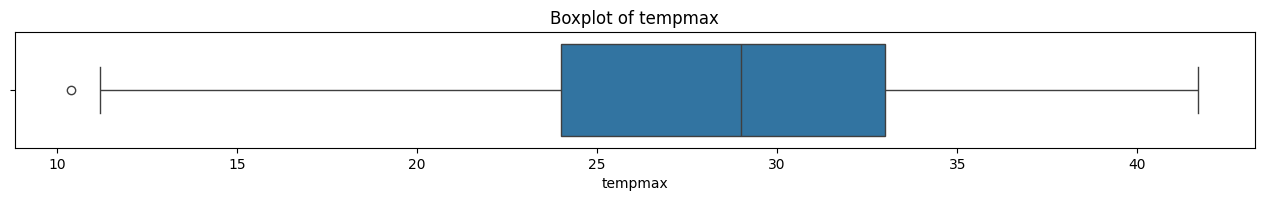

Feature tempmin:
- Lower bound: 6.0, Upper bound: 38.0
- Number of outliers: 0
Series([], Name: tempmin, dtype: float64)


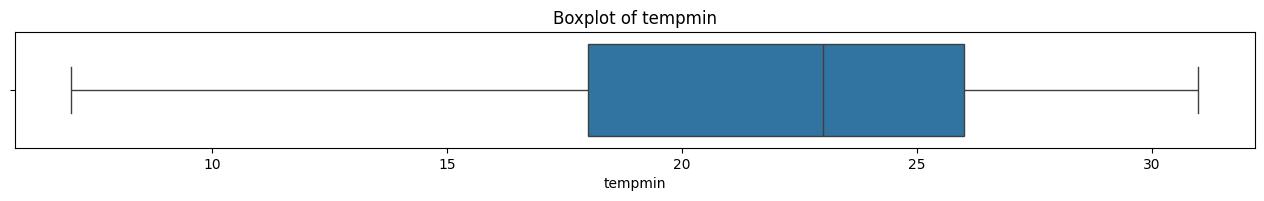

Feature temp:
- Lower bound: 9.049999999999995, Upper bound: 40.650000000000006
- Number of outliers: 1
datetime
2022-02-20    9.0
Name: temp, dtype: float64


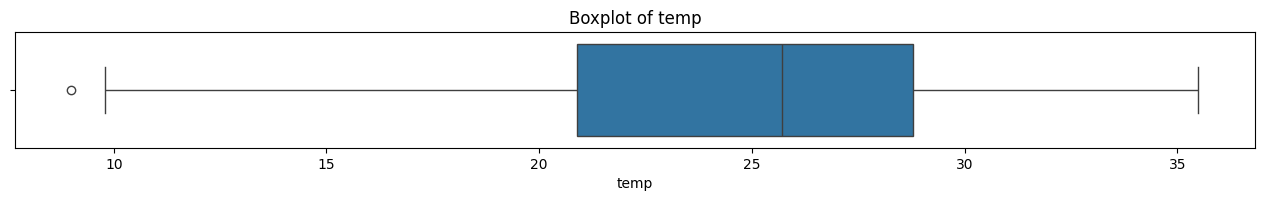

Feature feelslikemax:
- Lower bound: -1.0500000000000043, Upper bound: 65.75
- Number of outliers: 0
Series([], Name: feelslikemax, dtype: float64)


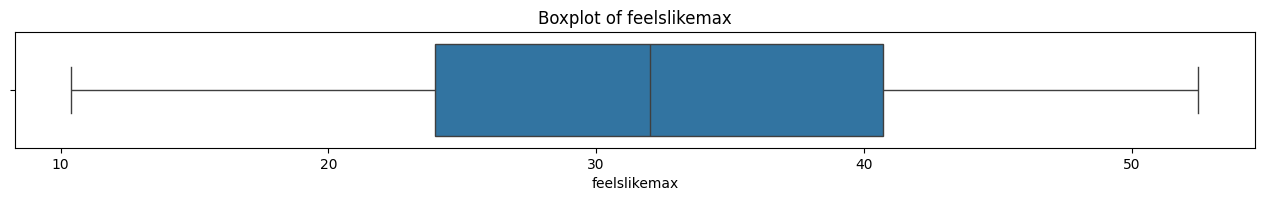

Feature feelslikemin:
- Lower bound: 6.0, Upper bound: 38.0
- Number of outliers: 11
datetime
2017-08-13    38.8
2018-07-05    38.1
2019-07-19    39.7
2021-06-02    38.2
2021-06-03    40.4
2021-06-21    38.8
2021-08-05    38.2
2021-08-06    39.5
2022-02-20     5.0
2023-01-25     5.2
2024-06-22    38.2
Name: feelslikemin, dtype: float64


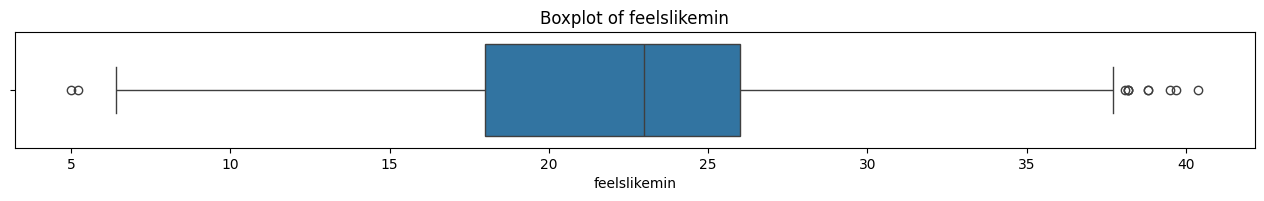

Feature feelslike:
- Lower bound: 2.1499999999999986, Upper bound: 52.15
- Number of outliers: 0
Series([], Name: feelslike, dtype: float64)


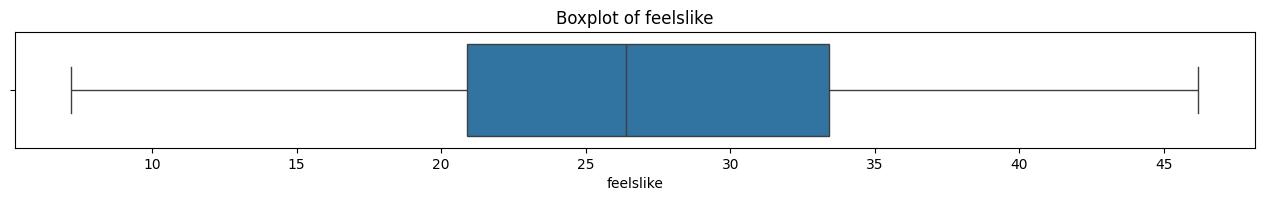

Feature dew:
- Lower bound: 3.599999999999998, Upper bound: 38.0
- Number of outliers: 30
datetime
2017-12-19    3.0
2017-12-20    2.7
2018-02-03    3.3
2018-02-04    2.9
2018-02-05    2.7
2018-02-06    1.2
2018-02-07    2.8
2018-02-08    1.9
2019-12-06    3.1
2020-12-20    3.2
2020-12-21    2.1
2020-12-31    1.5
2021-01-01   -0.5
2021-01-08    2.0
2021-01-09   -2.1
2021-01-10   -1.9
2021-01-11   -1.7
2021-01-12   -1.5
2021-01-13    2.9
2022-12-18   -1.1
2022-12-19    2.1
2023-01-28    1.0
2023-01-29    2.5
2023-12-22    0.7
2023-12-23    2.3
2023-12-24    2.4
2023-12-25    2.3
2025-01-12    3.3
2025-01-27    3.0
2025-01-28    3.3
Name: dew, dtype: float64


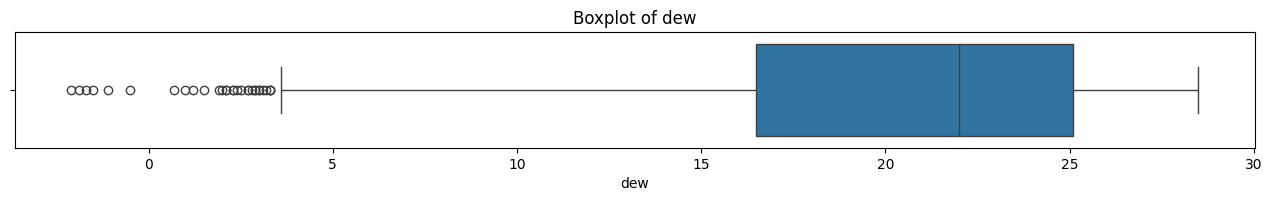

Feature humidity:
- Lower bound: 49.55, Upper bound: 107.55
- Number of outliers: 60
datetime
2016-11-27    43.3
2016-11-30    40.7
2016-12-01    45.4
2016-12-02    44.0
2016-12-06    43.0
2016-12-07    42.2
2017-05-26    48.0
2017-11-04    47.6
2017-12-19    44.1
2017-12-20    44.6
2018-02-03    48.1
2018-02-04    48.3
2018-02-06    45.0
2018-02-07    47.9
2018-02-08    42.5
2018-04-07    49.1
2019-12-02    49.4
2019-12-03    48.7
2019-12-04    49.5
2019-12-05    40.2
2019-12-06    41.1
2020-02-17    46.5
2020-02-18    45.9
2020-11-09    49.5
2020-11-10    49.0
2020-11-30    48.9
2020-12-20    44.4
2020-12-21    39.8
2020-12-30    43.5
2020-12-31    42.6
2021-01-01    42.3
2021-01-09    42.2
2021-01-10    41.0
2021-01-11    37.6
2021-01-12    35.9
2021-01-13    46.6
2021-01-18    47.5
2021-03-22    46.0
2021-03-23    48.9
2021-06-20    48.4
2021-11-09    49.4
2021-11-10    47.0
2022-10-17    45.7
2022-10-18    43.9
2022-12-14    48.4
2022-12-17    39.1
2022-12-18    31.1
2022-12-19   

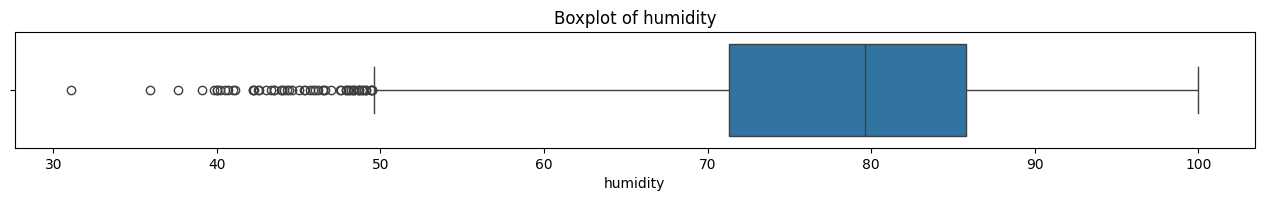

Feature precip:
- Lower bound: -3.5505, Upper bound: 5.9175
- Number of outliers: 523
datetime
2016-08-03    14.371
2016-08-05    14.654
2016-08-07     8.600
2016-08-10     6.832
2016-08-12    24.399
               ...  
2024-10-21    32.694
2025-02-25    11.388
2025-03-16    10.857
2025-04-21    10.540
2025-04-28     6.537
Name: precip, Length: 523, dtype: float64


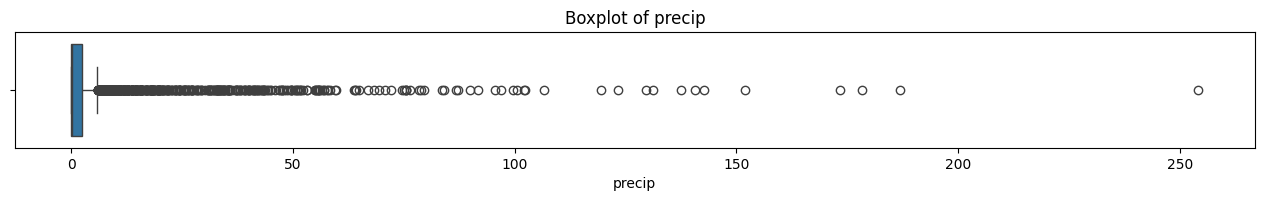

Feature precipcover:
- Lower bound: -18.75, Upper bound: 31.25
- Number of outliers: 119
datetime
2016-08-27    66.67
2016-09-09    41.67
2016-10-23    37.50
2016-11-01    41.67
2016-11-22    33.33
              ...  
2024-10-17    33.33
2024-10-20    37.50
2024-11-18    50.00
2025-04-25    41.67
2025-04-27    33.33
Name: precipcover, Length: 119, dtype: float64


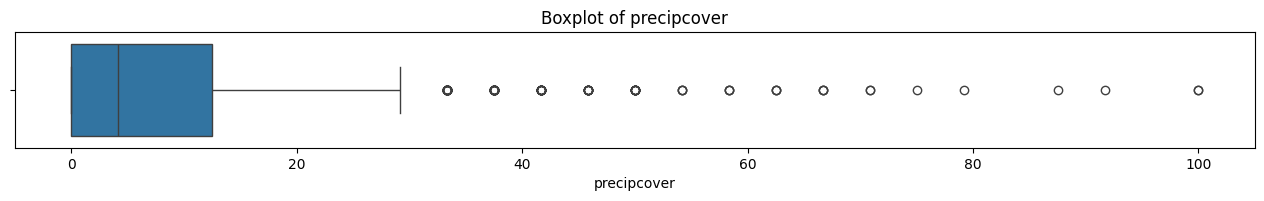

Feature windgust:
- Lower bound: 7.5000000000000036, Upper bound: 45.099999999999994
- Number of outliers: 91
datetime
2016-08-18    48.2
2016-08-19    70.6
2016-08-20    46.1
2016-09-01    59.4
2016-09-10    57.6
              ... 
2024-12-11    45.7
2025-01-26    49.0
2025-04-12    51.5
2025-04-22    47.5
2025-04-23    48.6
Name: windgust, Length: 91, dtype: float64


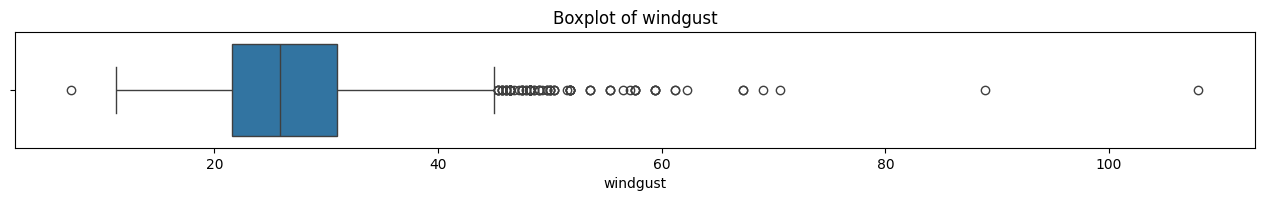

Feature windspeed:
- Lower bound: 4.000000000000002, Upper bound: 30.4
- Number of outliers: 41
datetime
2016-08-19    46.4
2016-09-01    40.7
2016-11-08    31.7
2017-03-25    31.5
2017-06-06    36.0
2017-07-08    30.6
2018-01-08    36.2
2018-03-08    33.5
2018-04-06    31.5
2019-03-23    30.6
2019-04-28    31.5
2019-08-03    32.6
2020-03-04    31.7
2020-05-08    30.6
2020-05-17    35.3
2020-12-30    30.6
2021-03-21    33.5
2021-06-04    37.1
2021-09-08    31.7
2021-10-21    33.5
2021-11-08    33.5
2022-01-29    33.5
2022-03-23    31.7
2022-04-01    31.7
2022-05-01    35.3
2023-06-21    37.1
2023-07-12    31.7
2023-07-31    35.3
2023-08-28    33.5
2023-12-16    33.5
2024-03-19    33.5
2024-04-20    38.9
2024-06-17    37.1
2024-08-10    31.7
2024-08-11    31.7
2024-09-07    53.6
2024-09-08    38.9
2024-09-09    30.6
2024-09-21    37.1
2025-01-26    38.9
2025-03-29    31.7
Name: windspeed, dtype: float64


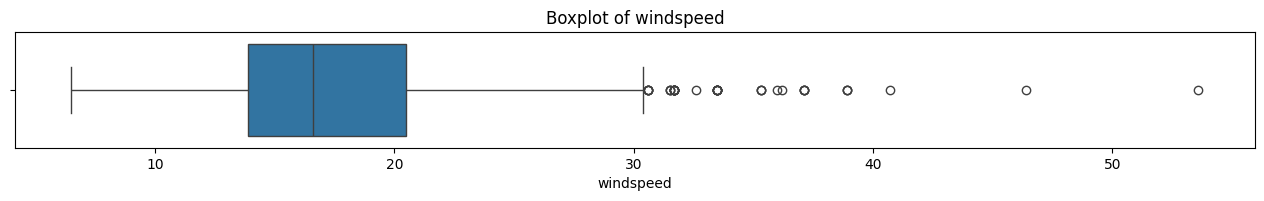

Feature sealevelpressure:
- Lower bound: 988.3, Upper bound: 1033.8999999999999
- Number of outliers: 0
Series([], Name: sealevelpressure, dtype: float64)


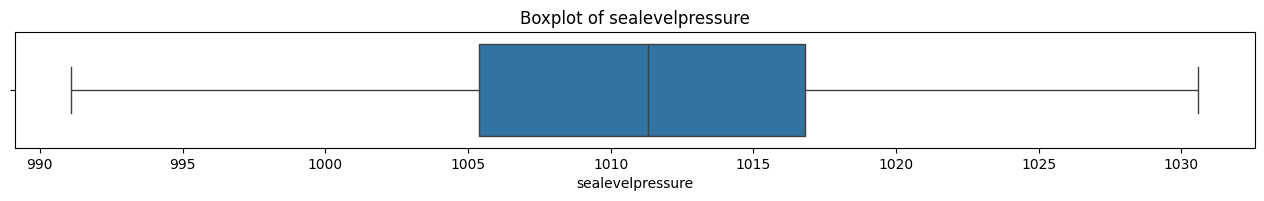

Feature cloudcover:
- Lower bound: 1.3000000000000185, Upper bound: 128.89999999999998
- Number of outliers: 20
datetime
2016-11-28    0.1
2016-12-11    1.1
2017-10-30    1.2
2017-12-19    0.6
2018-11-01    0.9
2018-11-03    0.1
2019-09-29    0.2
2019-10-01    1.0
2019-11-05    1.3
2019-12-05    0.4
2019-12-10    0.0
2019-12-11    0.0
2020-12-06    0.7
2021-01-02    0.0
2021-01-19    0.0
2021-12-05    0.2
2021-12-06    0.3
2021-12-07    0.0
2023-02-26    0.8
2024-10-05    0.3
Name: cloudcover, dtype: float64


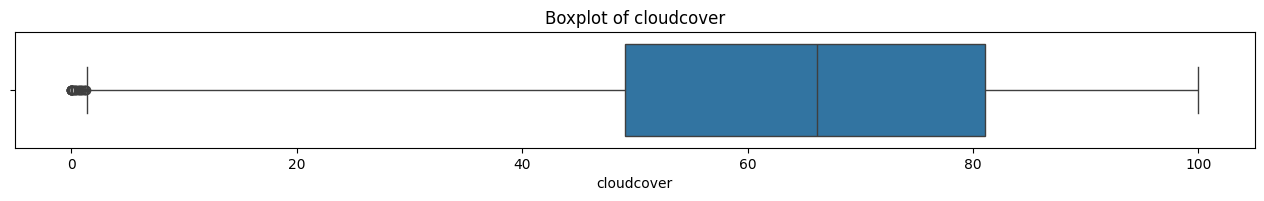

Feature visibility:
- Lower bound: 4.174999999999999, Upper bound: 13.175000000000002
- Number of outliers: 69
datetime
2016-12-11     4.0
2016-12-19     3.9
2017-01-10     2.7
2017-03-11     2.5
2017-03-12     4.1
              ... 
2024-04-07     3.6
2025-02-19     4.0
2025-02-20     3.2
2025-03-10     4.0
2025-04-27    17.3
Name: visibility, Length: 69, dtype: float64


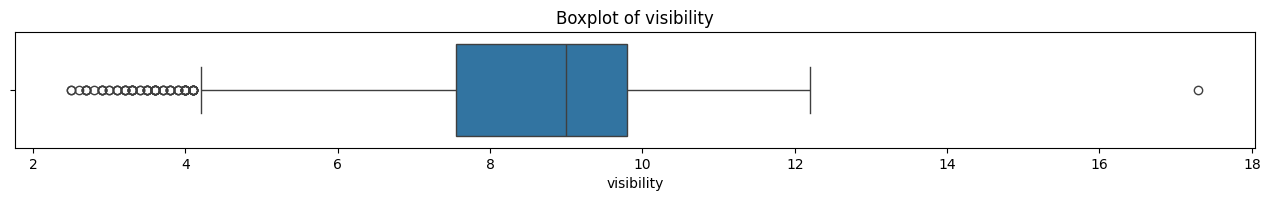

Feature solarradiation:
- Lower bound: -96.29999999999998, Upper bound: 398.5
- Number of outliers: 0
Series([], Name: solarradiation, dtype: float64)


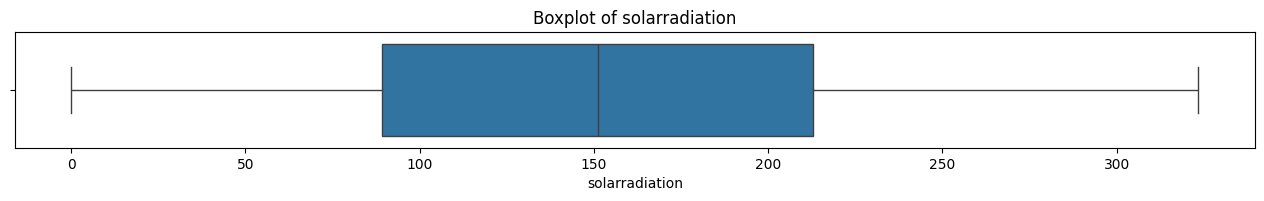

Feature solarenergy:
- Lower bound: -8.349999999999998, Upper bound: 34.449999999999996
- Number of outliers: 0
Series([], Name: solarenergy, dtype: float64)


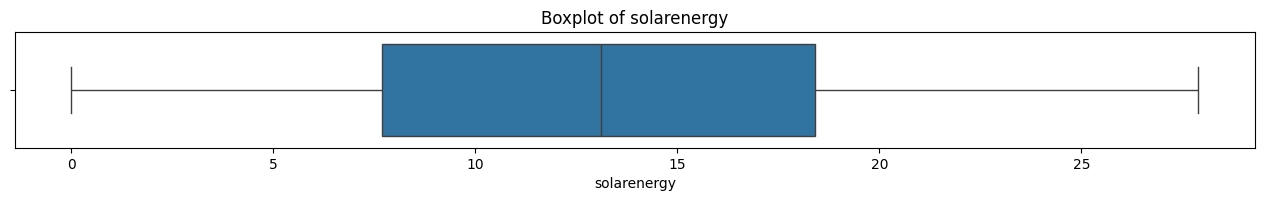

Feature uvindex:
- Lower bound: -2.0, Upper bound: 14.0
- Number of outliers: 0
Series([], Name: uvindex, dtype: int64)


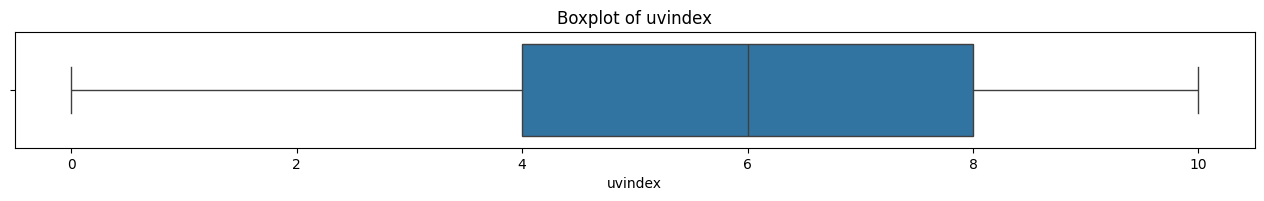

Feature conditions:
- Lower bound: -2.5, Upper bound: 9.5
- Number of outliers: 0
Series([], Name: conditions, dtype: int64)


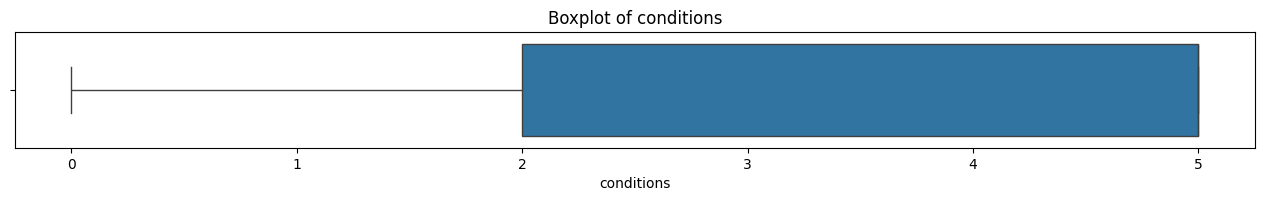

Feature year:
- Lower bound: 2010.5, Upper bound: 2030.5
- Number of outliers: 0
Series([], Name: year, dtype: int32)


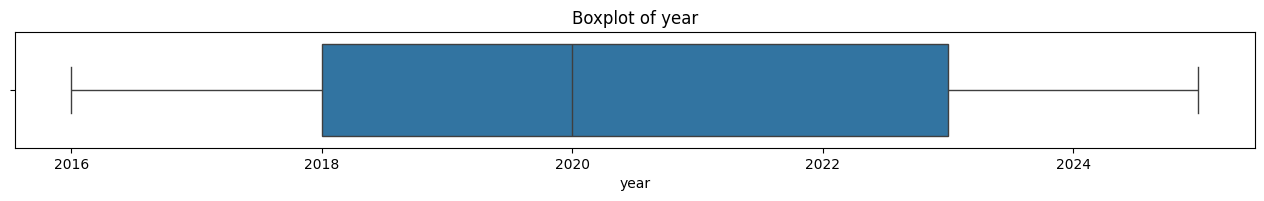

Feature month:
- Lower bound: -7.5, Upper bound: 20.5
- Number of outliers: 0
Series([], Name: month, dtype: int32)


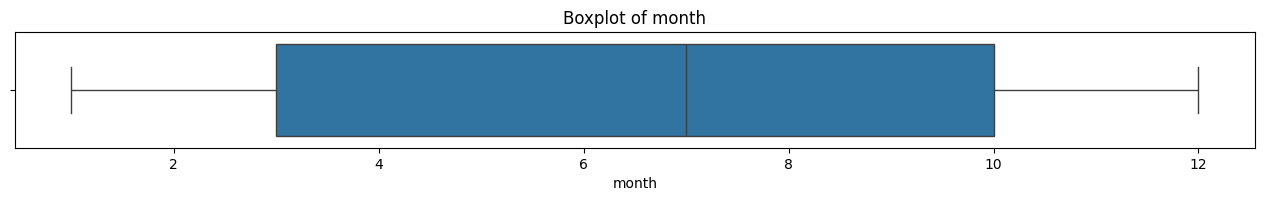

Feature day:
- Lower bound: -14.5, Upper bound: 45.5
- Number of outliers: 0
Series([], Name: day, dtype: int32)


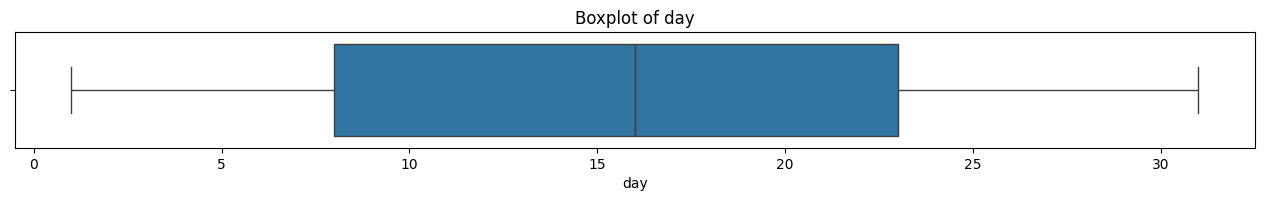

In [19]:
def boxplot(df: pd.DataFrame, col: str):
    plt.figure(figsize=(16, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

def count_outlier(df: pd.DataFrame, col: str):
    print(f'Feature {col}:')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5

    print(f'- Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'- Number of outliers: {len(outliers)}')
    print(outliers[col])
    boxplot(df, col)

for col in df.columns:
    if df[col].dtype != object:
        count_outlier(df, col)

### ***3. Results of preprocessing***

In [20]:
df.tail()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,year,month,day
datetime,,,,,,,,,,,,,,,,,,,,,
2025-04-26,28.0,24.0,26.3,31.1,24.0,27.6,22.8,81.5,0.100,4.17,...,1010.5,97.5,8.7,168.3,14.6,8,4,2025,4,26
2025-04-27,33.3,25.0,28.0,37.4,25.0,29.9,23.2,76.7,0.900,33.33,...,1009.8,85.4,17.3,185.7,15.8,6,5,2025,4,27
2025-04-28,28.0,23.0,25.5,30.7,23.0,25.8,23.3,88.4,6.537,8.33,...,1011.7,79.2,8.7,37.9,3.1,2,5,2025,4,28
2025-04-29,28.3,24.0,25.5,31.6,24.0,26.1,23.1,86.5,0.098,4.17,...,1012.2,58.2,7.8,206.9,17.8,7,5,2025,4,29
2025-04-30,31.0,25.0,27.3,36.8,25.0,29.7,24.3,84.4,0.397,8.33,...,1011.2,66.8,6.9,216.8,18.7,8,5,2025,4,30


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3195 entries, 2016-08-01 to 2025-04-30
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           3195 non-null   float64
 1   tempmin           3195 non-null   float64
 2   temp              3195 non-null   float64
 3   feelslikemax      3195 non-null   float64
 4   feelslikemin      3195 non-null   float64
 5   feelslike         3195 non-null   float64
 6   dew               3195 non-null   float64
 7   humidity          3195 non-null   float64
 8   precip            3195 non-null   float64
 9   precipcover       3195 non-null   float64
 10  windgust          3195 non-null   float64
 11  windspeed         3195 non-null   float64
 12  sealevelpressure  3195 non-null   float64
 13  cloudcover        3195 non-null   float64
 14  visibility        3195 non-null   float64
 15  solarradiation    3195 non-null   float64
 16  solarenergy       3195 n

In [22]:
df.isnull().sum()

tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipcover         0
windgust            0
windspeed           0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
conditions          0
year                0
month               0
day                 0
dtype: int64

In [23]:
df.columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'windgust',
       'windspeed', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'year',
       'month', 'day'],
      dtype='object')

---
## **III. Exploratory Data Analysis**

### ***1. Weather trends & patterns over time***

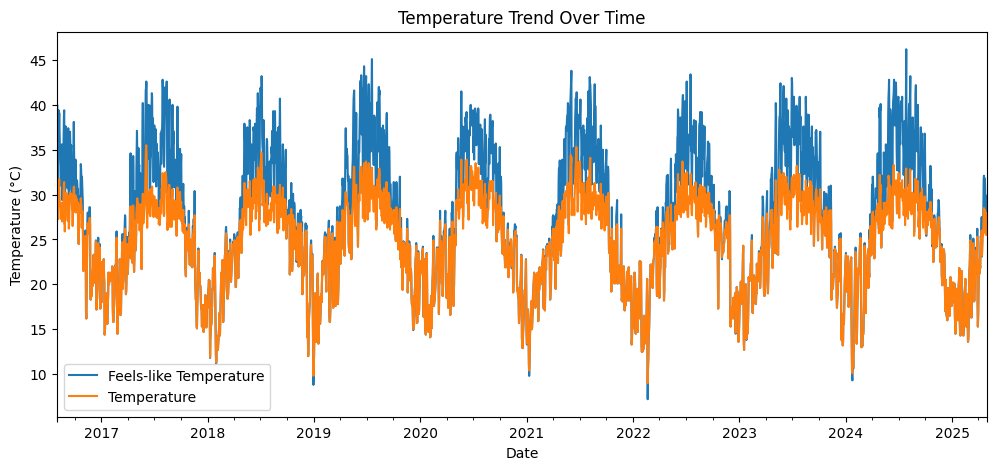

In [24]:
df['feelslike'].plot(figsize=(12,5), title="Temperature Trend Over Time", label='Feels-like Temperature')
df['temp'].plot(label='Temperature')
plt.legend(loc='lower left')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show()

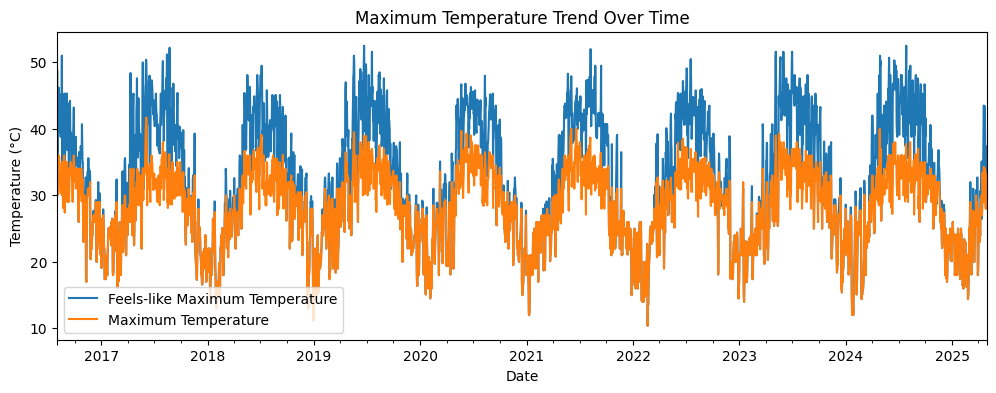

In [25]:
df['feelslikemax'].plot(figsize=(12,4), title="Maximum Temperature Trend Over Time", label='Feels-like Maximum Temperature')
df['tempmax'].plot(label ='Maximum Temperature')
plt.legend(loc='lower left')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show()

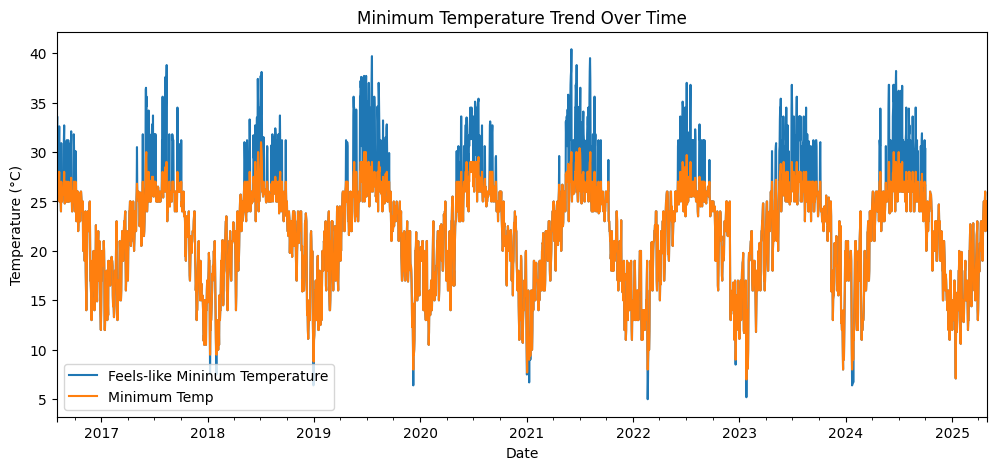

In [26]:
df['feelslikemin'].plot(figsize=(12,5), title="Minimum Temperature Trend Over Time", label='Feels-like Mininum Temperature')
df['tempmin'].plot(label ='Minimum Temp')
plt.legend(loc='lower left')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show()

The overall pattern is that the temperature rises gradually from the start of the year to its peak in the middle, after which it falls until the end.

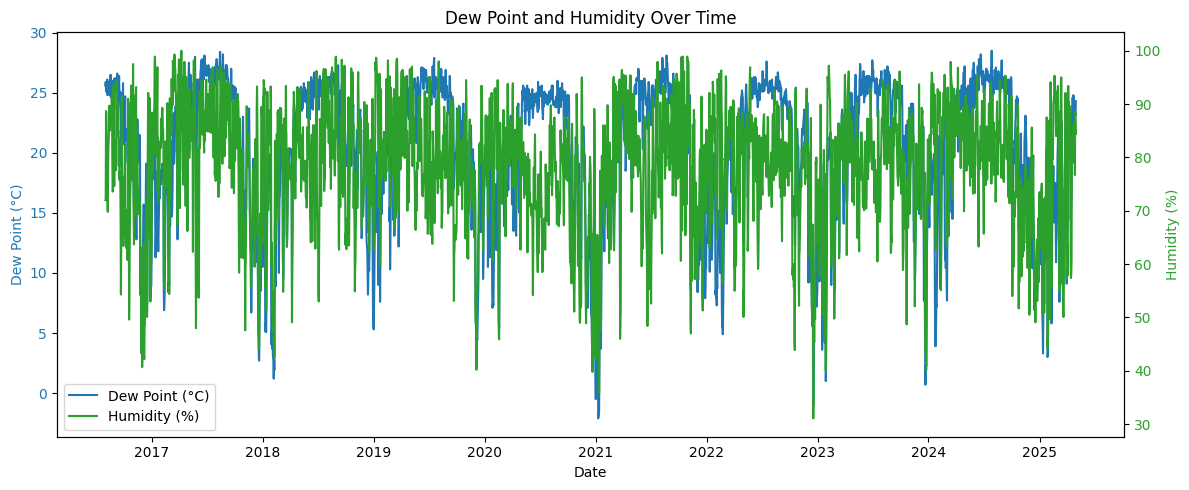

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot dew point
line1, = ax1.plot(df.index, df["dew"], color='tab:blue', label='Dew Point (°C)')
ax1.set_xlabel("Date")
ax1.set_ylabel("Dew Point (°C)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot humidity on second y-axis
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df["humidity"], color='tab:green', label='Humidity (%)')
ax2.set_ylabel("Humidity (%)", color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower left')

# Title and layout
plt.title("Dew Point and Humidity Over Time")
fig.tight_layout()
plt.show()


The dew points show a strong seasonal pattern – rising and falling each year, which peaks during warmer months and drops during colder months. Humidity also shows seasonal variation but exhibits more fluctuations. High humidity aligns with high dew point seasons (especially in the middle of each year). Both are strong indicators of rain, fog, and overall comfort level.

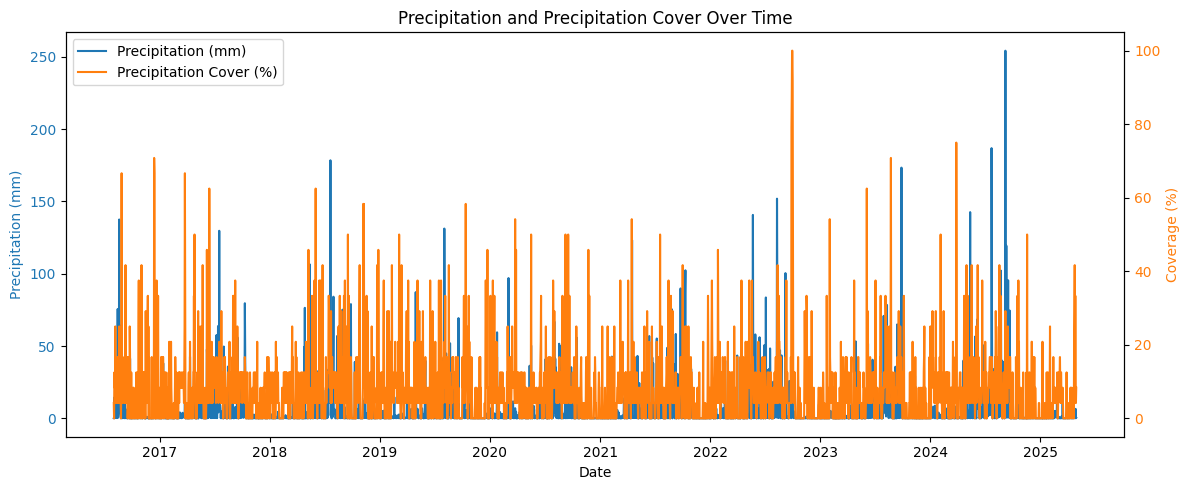

In [28]:
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot precip on left y-axis
line1, = ax1.plot(df.index, df["precip"], color='tab:blue', label='Precipitation (mm)')
ax1.set_xlabel("Date")
ax1.set_ylabel("Precipitation (mm)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot precipcover on right y-axis
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df["precipcover"], color='tab:orange', label='Precipitation Cover (%)')
ax2.set_ylabel("Coverage (%)", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Title and layout
plt.title("Precipitation and Precipitation Cover Over Time")
fig.tight_layout()
plt.show()


Precipitation shows most values below 50mm, meaning heavy rainfall is occasional. Also, precipitation occurs in bursts and is highly variable. Precipitation cover follows a similar pattern to precipitation but is more frequent and less spiky. Even when rainfall is low (in mm), the cover can still be high - like a day with light but constant rain. They can directly be used as a target variable or to detect wet/dry patterns.

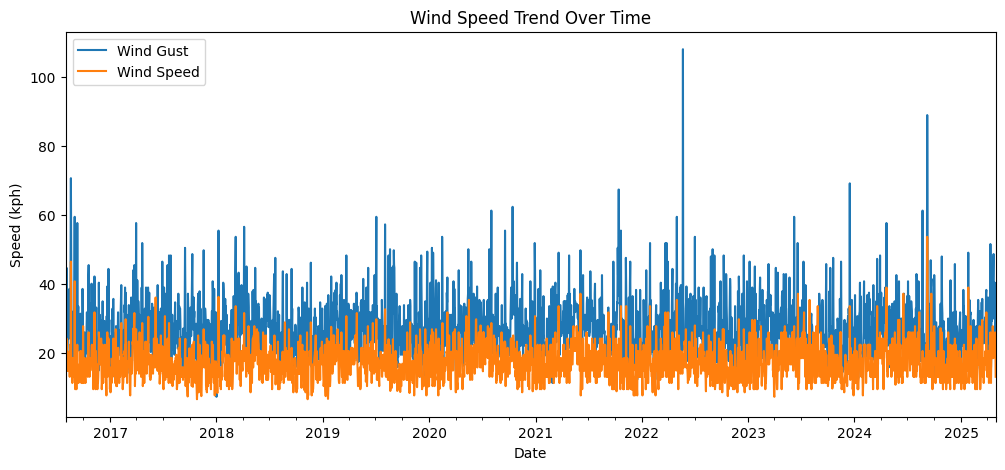

In [29]:
df['windgust'].plot(figsize=(12,5), title="Wind Speed Trend Over Time", label='Wind Gust')
df['windspeed'].plot(label ='Wind Speed')
plt.legend(loc='upper left')
plt.ylabel('Speed (kph)')
plt.xlabel('Date')
plt.show()

Wind gust is more random and spikier than regular wind speed, frequently reaches 40-60 kph, with extreme events peaking over 100 kph. But the peak of wind gusts is persistent throughout the year. Wind speed is more stable, showing minor seasonal fluctuation, but no strong increasing or decreasing trend. These will help predict storm risk, pressure changes, and cold fronts and Gusts can be modeled for extreme weather alerts.

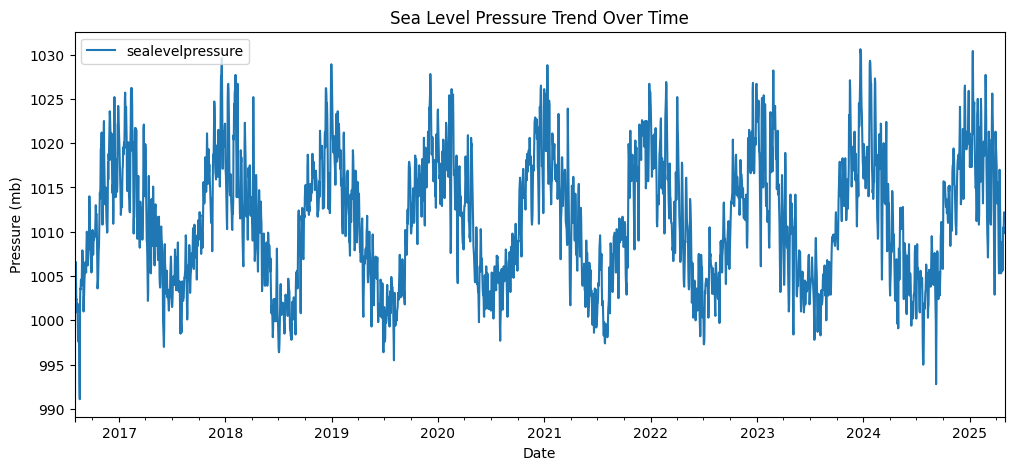

In [30]:
df['sealevelpressure'].plot(figsize=(12,5), title="Sea Level Pressure Trend Over Time")
plt.legend(loc='upper left')
plt.ylabel('Pressure (mb)')
plt.xlabel('Date')
plt.show()

Sea-level pressure shows a strong annual cycle with values ranging approximately from 995 to 1030 mb. This consistent pattern reflects natural atmospheric pressure changes driven by seasonal transitions. This feature is an important predictor for weather events, as significant drops often indicate incoming storms or low-pressure systems.

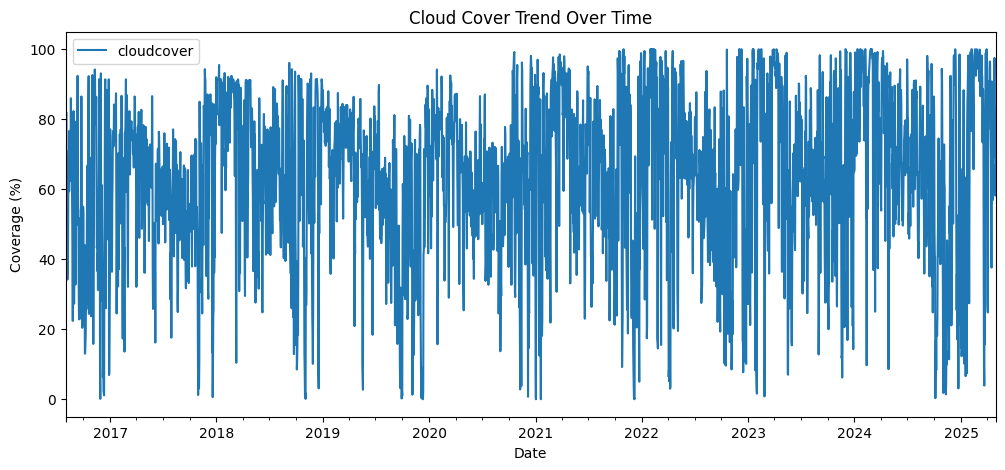

In [31]:
df['cloudcover'].plot(figsize=(12,5), title="Cloud Cover Trend Over Time")
plt.legend(loc='upper left')
plt.ylabel('Coverage (%)')
plt.xlabel('Date')
plt.show()

Cloud cover shows frequent fluctuations from 0% to 100%. It appears to follow some seasonal cycles, with spikes likely in rainy/monsoon seasons.

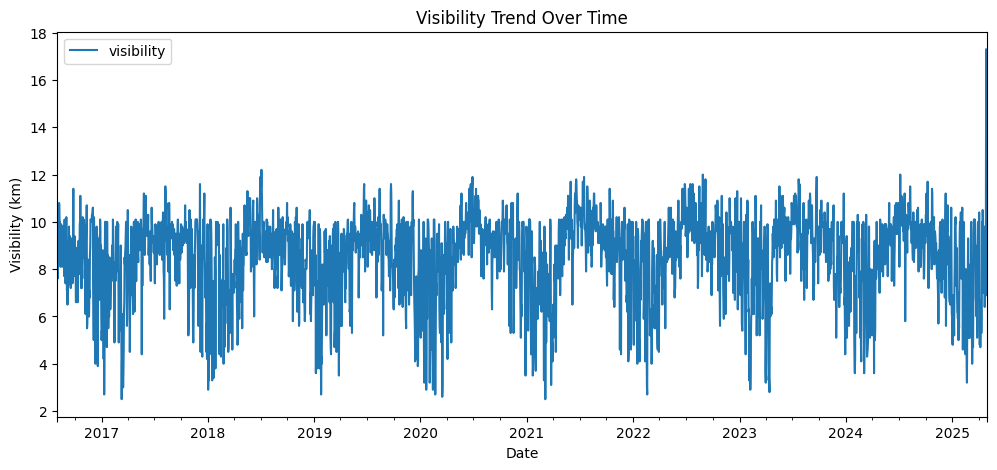

In [32]:
df['visibility'].plot(figsize=(12,5), title="Visibility Trend Over Time")
plt.legend(loc='upper left')
plt.ylabel('Visibility (km)')
plt.xlabel('Date')
plt.show()

Generally, visibility fluctuates around 8-11 km, with occasional sharp drops to around 3-5 km and slight rises to 12 km. The drops could be caused by fog, rain, or pollution, which is especially true as most drops occurred during the winter months when precipitation scattered and pollution in the city worsened. Also, 10 km seems to be the limit to how far residents can see for most days of the year.

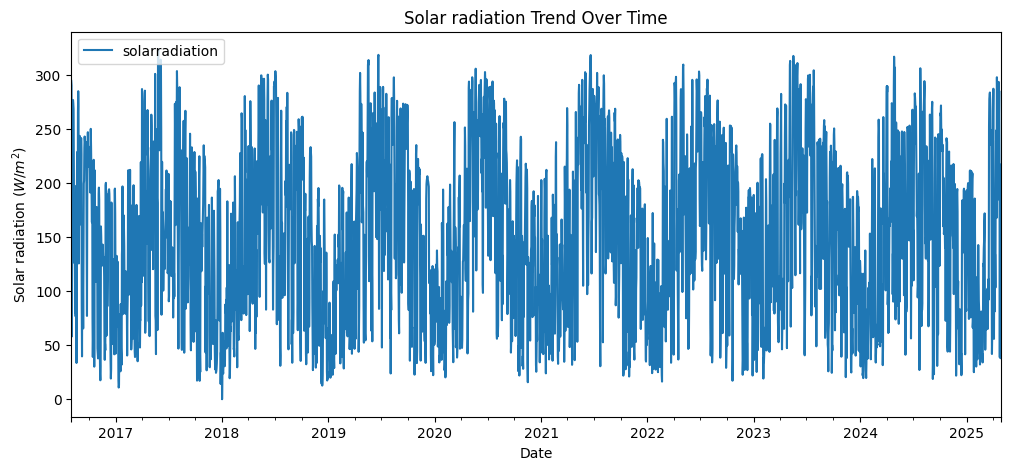

In [33]:
df['solarradiation'].plot(figsize=(12,5), title="Solar radiation Trend Over Time")
plt.legend(loc='upper left')
plt.ylabel(r'Solar radiation ($W/m^2$)')
plt.xlabel('Date')
plt.show()

This graph shows strong seasonal cycles — peaks appear annually, especially in the middle of each year (likely summer), with lows in winter months and forms clear annual wave patterns.

### ***2. `Conditions` distribution***

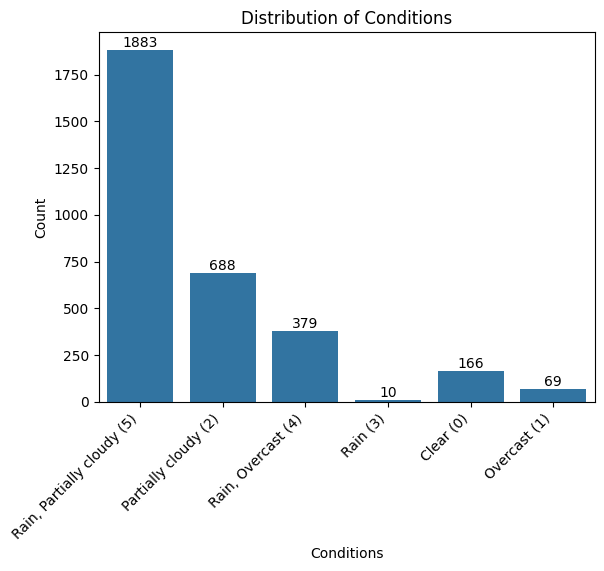

In [34]:
df['conditions_original'] = df['conditions'].map(lambda x: f"{le.inverse_transform([x])[0]} ({x})")
ax = sns.countplot(x='conditions_original', data=df)
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.title('Distribution of Conditions')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()
df.drop(columns=['conditions_original'], inplace=True)

“Rain, Partially Cloudy” and “Partially Cloudy” dominate and “Clear” and “Overcast” appear less often. The category “Rain” may be narrowly defined; a datapoint is likely considered to be “Rain” when the sky is fully overcast and raining heavily. Meanwhile, "Rain, Partially Cloudy" likely includes any rain that occurs with intermittent cloud breaks, which is much more common.

### ***3. Feature analysis***

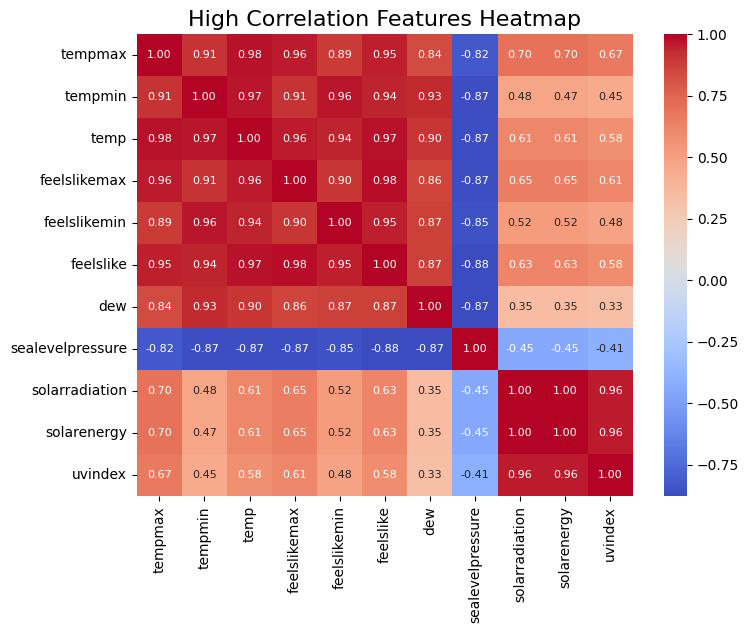

In [35]:
corr_matrix = df.corr()
target = 'temp'

#Find features with high absolute correlation
high_corr_features = corr_matrix[target][abs(corr_matrix[target]) > 0.5].index.tolist()

filtered_corr_matrix = df[high_corr_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size":8})
plt.title('High Correlation Features Heatmap', fontsize=16)
plt.show()

Strong Positive Correlations:
- temp, tempmax, tempmin, feelslike, and dew are strongly correlated (ρ > 0.9).
- Implication: These variables reflect the same thermal conditions and should be carefully selected to avoid multicollinearity in models.

Negative Correlation with Sea Level Pressure:
- sealevelpressure is negatively correlated with temperature-related variables (ρ ≈ -0.87).
- Implication: Lower pressure often corresponds to stormy or warmer conditions, which is useful in forecasting storms.

Solar Radiation & UV Index:
- Correlated with temperature and inversely with sea-level pressure — supporting their role in daytime heating and clear weather.


## **IV. Methodology**

### ***1. Brief overview***

### ***2. Model building***


#### 2.1. Load and combine datasets

In [36]:
target_column = 'conditions'
feature_columns = [
    'temp', 'humidity', 'precip', 'precipcover', 'windspeed', 'cloudcover',
    'sealevelpressure', 'solarradiation', 'visibility'
]

feature_columns.extend(['year', 'month', 'day'])

y = df[target_column]
X = df[feature_columns]

#### 2.2. Train-test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### 2.3. Train Random Forest Classifier

In [38]:
from imblearn.over_sampling import BorderlineSMOTE
X_train_resampled, y_train_resampled = BorderlineSMOTE(random_state=42, kind='borderline-1').fit_resample(X_train, y_train)

from collections import Counter
print(Counter(y_train))
print(Counter(y_train_resampled))

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_resampled, y_train_resampled)

Counter({5: 1506, 2: 551, 4: 303, 0: 133, 1: 55, 3: 8})
Counter({0: 1506, 5: 1506, 4: 1506, 2: 1506, 1: 1506, 3: 1506})


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

#### 2.4. Make predictions

In [39]:
y_pred = rf.predict(X_test)

---
## **V. Results and Evaluations**
### ***1. Initial accuracy check***

In [40]:
print("Test set class distribution:")
print(pd.Series(y_test).value_counts())
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Test set class distribution:
conditions
5    377
2    137
4     76
0     33
1     14
3      2
Name: count, dtype: int64
Accuracy: 1.000


### ***2. Classification report***

In [41]:
# Calculate metrics
print("\nModel Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model Performance:

Classification Report:
                        precision    recall  f1-score   support

                 Clear       1.00      1.00      1.00        33
              Overcast       1.00      1.00      1.00        14
      Partially cloudy       1.00      1.00      1.00       137
                  Rain       1.00      1.00      1.00         2
        Rain, Overcast       1.00      1.00      1.00        76
Rain, Partially cloudy       1.00      1.00      1.00       377

              accuracy                           1.00       639
             macro avg       1.00      1.00      1.00       639
          weighted avg       1.00      1.00      1.00       639



### ***3. Confusion matrix***

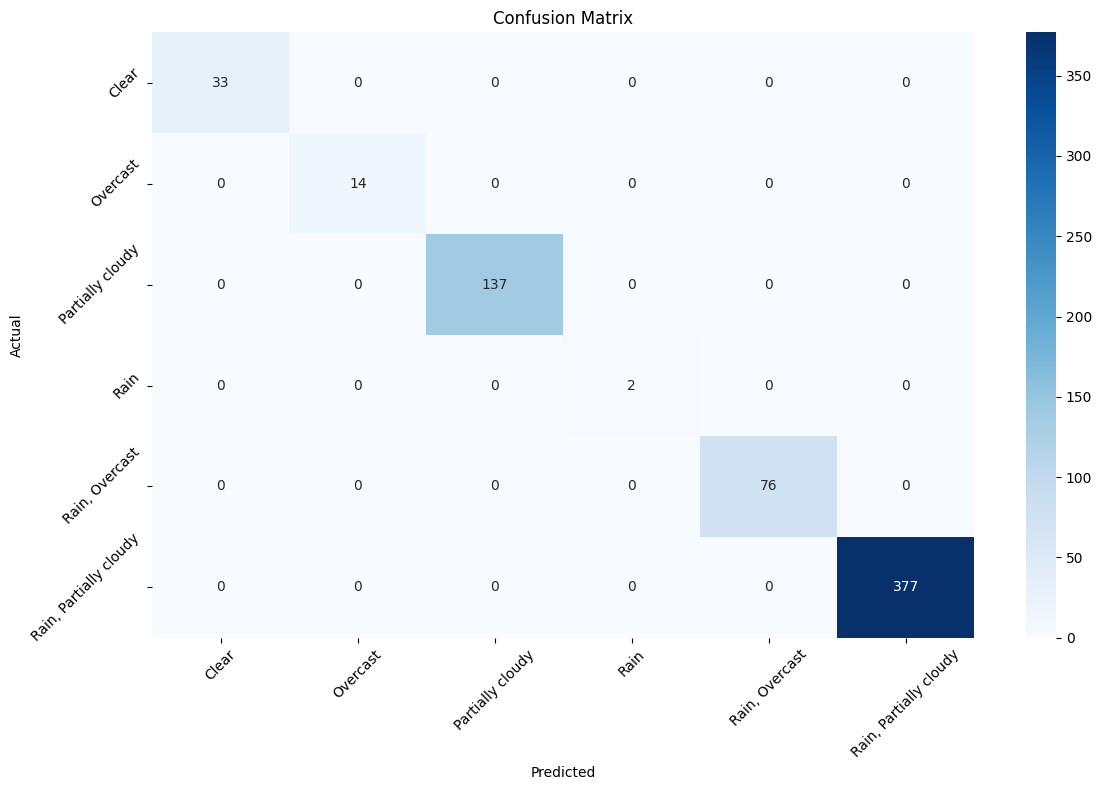

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

### ***4. Feature importance***

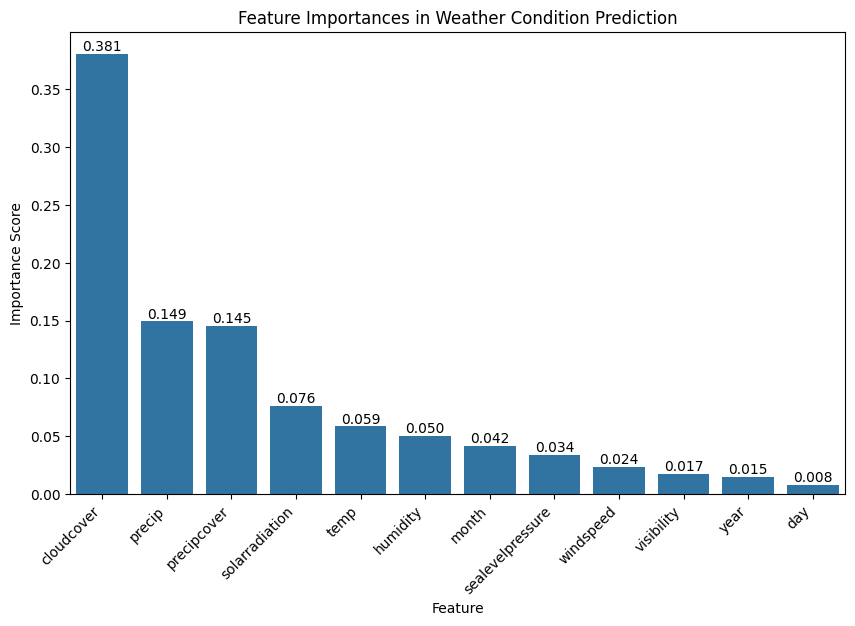

In [43]:
importances = pd.Series(rf.feature_importances_, index=feature_columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=importances.index, y=importances)
plt.title('Feature Importances in Weather Condition Prediction')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

---
## **VI. Conclusions**